# Лабораторная работа № 3 на питоне

## Подготовка к работе

#### Если работаете не в Google Collab, то нужно подгрузить следующие библиотеки:


In [ ]:
# pip install openpyxl
# pip install seaborn
# pip install xlrd

#### Импортирование библиотек

In [1]:
import pandas as pd #специальные структуры данных и операции для манипулирования числовыми таблицами
import numpy as np #добавляет поддержку больших многомерных массивов и матриц
import matplotlib.pyplot as plt #библиотека для построения научных графиков
import scipy.stats as sts #все функции статистики
import seaborn as sns #библиотека для создания статистических графиков на Python
import numpy.linalg as nl #реализует операции линейной алгебры
%matplotlib inline 
# %matplotlib inline нужен для визуализации статических графиков matplotlib в Jupyter Notebook

## Перечисление признаков
### Названия переменных должны быть такими же, как в Excel !!!

In [2]:
features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9'] #должны быть с таким же названием как в экселе
f_len = len(features) #измеряется длина списка - количество признаков

## Загрузка Excel-файла
### Подставь свои значения в метод read_excel - имя эксель-файла и название нужного листа !!!

In [4]:
# подставь свои значения! - имя эксель-файла и названия листа
data = pd.read_excel("norm_data.xlsx", engine='openpyxl', index_col=0).loc[:, features] 
data.columns=features #задаются названия колонок 
X = data.values # таблица всех значений
data.head() #просмотр первых n строк фрейма данных pandas

,X1,X2,X3,X4,X5,X6,X7,X8,X9
Регион,,,,,,,,,
Алтайский край,0.423721,0.439726,-0.646954,1.676521,0.920458,-0.832257,0.922800,-0.626353,0.089137
Амурская область,1.932733,1.687317,0.722511,0.050502,1.192731,0.517564,0.966786,0.206284,-0.368074
Архангельская область без автономного ок,-0.667681,0.589500,1.640880,-0.664946,0.235605,0.155037,0.652055,0.095233,-0.498706
Астраханская область,0.097353,-0.503612,-0.666108,-0.274702,-0.707612,-0.359749,-0.375588,-0.576026,0.565010
Белгородская область,-0.923862,-0.523216,-0.730266,-0.534865,1.825977,-0.222914,-0.842681,-0.039178,0.723634


### Нормировка

## Нахождение корреляционной матрицы

In [5]:
print("Корреляционная матрица:")
correlation = data.corr() #корреляционная матрица
correlation

Корреляционная матрица:


,X1,X2,X3,X4,X5,X6,X7,X8,X9
X1,1.000000,0.424649,0.231616,-0.162421,0.255123,-0.179811,0.325123,-0.275671,-0.025242
X2,0.424649,1.000000,0.594993,0.021442,0.381429,0.196778,0.612704,0.061868,-0.236869
X3,0.231616,0.594993,1.000000,0.004660,0.140411,0.371633,0.472637,0.483304,-0.343512
X4,-0.162421,0.021442,0.004660,1.000000,-0.127318,-0.131076,0.058640,-0.107069,-0.057333
X5,0.255123,0.381429,0.140411,-0.127318,1.000000,0.165129,0.289761,-0.011878,-0.018994
X6,-0.179811,0.196778,0.371633,-0.131076,0.165129,1.000000,0.452447,0.750230,-0.322548
X7,0.325123,0.612704,0.472637,0.058640,0.289761,0.452447,1.000000,0.138288,-0.360360
X8,-0.275671,0.061868,0.483304,-0.107069,-0.011878,0.750230,0.138288,1.000000,-0.185402
X9,-0.025242,-0.236869,-0.343512,-0.057333,-0.018994,-0.322548,-0.360360,-0.185402,1.000000


#### Корреляционная матрица в виде тепловой карты

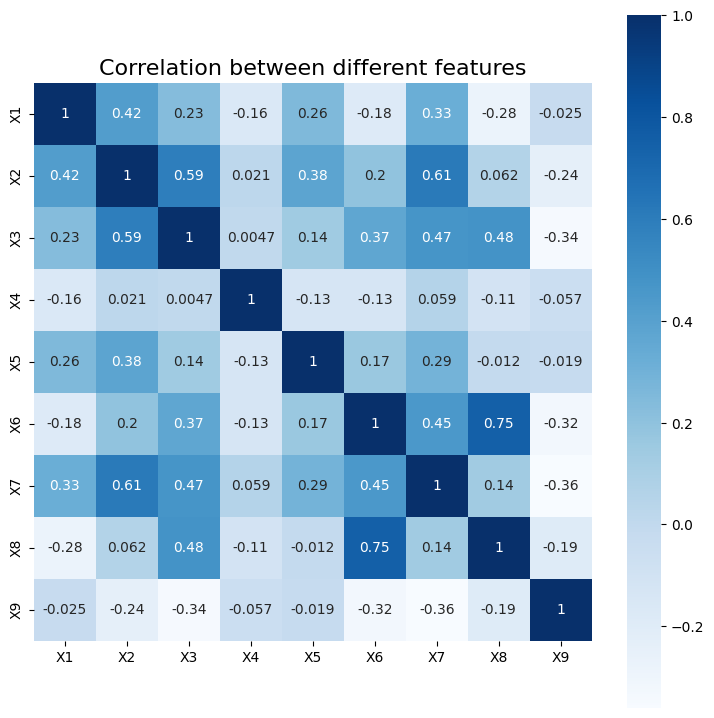

In [6]:
plt.figure(figsize=(9,9)) #создали область Figure
sns.heatmap(correlation, vmax=1, square=True, annot=True,cmap='Blues')
#heatmap - тепловая карта; vmax - значения для привязки цветовой карты
plt.title('Correlation between different features',fontsize=16) #заголовок тепловой карты
plt.show()

## Гипотеза о незначимости корреляционной матрицы

### Расчет оценок собственных чисел корреляционной матрицы

In [7]:
#проверка гипотезы о незначимости корреляционной матрицы
eigenvalues, eigenvector = np.linalg.eig(correlation) #вычисляет собственные числа (значения) и собственные векторы корреляционной матрицы
couple_lst = []
for i in range(len(eigenvalues)):
    couple_lst.append((eigenvalues[i], eigenvector[:, i])) #добавляет в конец списка значения по одиночке

couple_lst = sorted(couple_lst, key=lambda x: x[0], reverse=True)
#key (необязательный параметр): если указать ключ, то сортировка будет выполнена по функции этого ключа
#reverse: по умолчанию сортировка выполняется по возрастанию. Указано reverse=True, т.к. сортируем по убыванию
eigenvalues_sorted = sorted(eigenvalues, reverse=True)
print("Оценки собственных чисел корреляционной матрицы:")
eigenvalues_sorted
# couple_lst

Оценки собственных чисел корреляционной матрицы:


[3.0423031750716003,
 1.8635905056782158,
 1.1753850955619165,
 0.8419697012970508,
 0.7586466266512575,
 0.5380705734452834,
 0.413989585342517,
 0.2460871222140263,
 0.11995761473814125]

### Проверка гипотезы

In [59]:
import math #math предоставляет доступ к некоторым популярным математическим функциям и константам

def chi_2(n, k, R):
    return -(n-1/6*(2*k+5))*math.log(np.linalg.det(R)) 
#формула статистики Хи^2; math.log (x) используется для вычисления натурального логарифмического значения
#np.linalg.det(R) вычисление определителя заданного квадратного массива k – число факторов; n – объем выборки
chi2_z = chi_2(data.shape[0], data.shape[1], correlation) # .shape - это кортеж размеров массива
p_value =sts.chi2.sf(chi2_z, data.shape[1]* (data.shape[1]-1) / 2) #значение p-value
print("Статистика критерия: ", chi2_z)
print("Достигаемый уровень значимости (p-value): ", p_value)
if p_value > 0.05: 
    print("Гипотеза принимается, матрица парных коэффициентов корреляции незначима.")
else:
    print('Гипотеза отклоняется, матрица парных коэффициентов корреляции значима.')

Статистика критерия:  352.2134186943237
Достигаемый уровень значимости (p-value):  3.0275034456239784e-49
Гипотеза отклоняется, матрица парных коэффициентов корреляции значима.


## Построение доверительных интервалов

In [62]:
#доверительные интервалы
def eigenval_left(l, n):
    return l / (1 + sts.norm.ppf(0.975) * math.sqrt(2/(n-1))) #sts.norm.ppf квантиль

def eigenval_right(l, n):
    return  l / (1 - sts.norm.ppf(0.975) * math.sqrt(2/(n-1)))

conf_interval = np.empty((f_len, 3))
#f_len - кол-во признаков; возвращает массив заданной размерности, но без инициализации его значений
for i in range(conf_interval.shape[0]):
    conf_interval[i, 0] = eigenval_left(eigenvalues_sorted[i], data.shape[0])
    conf_interval[i, 1] = eigenvalues_sorted[i]
    conf_interval[i, 2] = eigenval_right(eigenvalues_sorted[i], data.shape[0])
    #заполнение левой и правой границ собственных значений 

print('Доверительные интервалы для собственных значений корреляционной матрицы:')
conf_interval_df = pd.DataFrame(conf_interval, columns=["left_border", "eig", "right_border"])
conf_interval_df

Доверительные интервалы для собственных значений корреляционной матрицы:


,left_border,eig,right_border
0,2.073419,2.700481,3.871263
1,1.633867,2.127995,3.050579
2,1.130686,1.472639,2.111095
3,0.866909,1.129087,1.618598
4,0.702907,0.915486,1.312392
5,0.509059,0.663013,0.950460
6,0.318807,0.415223,0.595241
7,0.236928,0.308582,0.442367
8,0.122202,0.159159,0.228162
9,0.083178,0.108334,0.155302


## Проверка гипотезы о кратности собственных чисел
### Если вам нужно проверять, то введите нужное r - число кратных корней !!!

In [64]:
#Проверка гипотезы о кратности собственных чисел

r = 2 #число кратных корней
N = X.shape[0] #число наблюдений
z = (N - 1) * sum(np.log(eigenvalues_sorted[:2])) + (N - 1) * r * np.log(1 / r * sum(eigenvalues_sorted[:2]))
n = r * (r + 1) / 2 - 1 #число степеней свободы
p_val = 2 * min(sts.chi2.cdf(z, n), sts.chi2.sf(z, n))
print("Достигаемый уровень значимости: ",p_val)
if p_val > 0.05:
    print(f"Гипотеза о кратности {r} собственных чисел принимается")
else:
    print(f"Гипотеза о кратности {r} собственных чисел отвергается")

Достигаемый уровень значимости:  1.7873413499896605e-64
Гипотеза о кратности 2 собственных чисел отвергается


## Оценка уровня информативности

In [65]:
#оценка уровня информативности
pc = 0
lmbd = 0

for i in range(4):
    lmbd = lmbd + eigenvalues_sorted[i]
    I = lmbd * 100 / f_len
    if (I > 55) & (pc == 0):
      pc = i+1
    #значения собственных чисел складываются, умножаются на 100, делятся на кол-во объектов
    print(f"Оценка информативности для {i + 1} главных компонент:")
    print('I(x) = {:.3f}%'.format(I))
print(f"Будет достаточно {pc} главных компонент, т.к. уровень информативности больше 55%")

Оценка информативности для 1 главных компонент:
I(x) = 27.005%
Оценка информативности для 2 главных компонент:
I(x) = 48.285%
Оценка информативности для 3 главных компонент:
I(x) = 63.011%
Оценка информативности для 4 главных компонент:
I(x) = 74.302%
Будет достаточно 3 главных компонент, т.к. уровень информативности больше 55%


## Критерий Кайзера

In [77]:
print("Критерий Кайзера: ", len(eigenvalues[eigenvalues > 1]))
#вычисляется длина массива для первых трех собсвенных чисел, поскольку все остальные <1
if len(eigenvalues[eigenvalues > 1]) >= pc:
    print(f"Гипотеза о достаточности {pc} главных компонент принимается")
else:
    print(f"Гипотеза о достаточности {pc} главных компонент отвергается")
pc = len(eigenvalues[eigenvalues > 1]) #количество главных компонент выбирается по критерию Кайзера для дальнейшей работы

Критерий Кайзера:  4
Гипотеза о достаточности 3 главных компонент принимается


## График собственных чисел

#### Подсчет матрицы дисперсий

In [96]:
# матрица дисперсий
dispersion = np.empty(len(eigenvalues)) #массив заданной размерности, но без инициализации его значений
eigenvalues_sum = eigenvalues.sum() #сумма собственных чисел

for i in range(dispersion.shape[0]):
    dispersion[i] = eigenvalues[i] / eigenvalues_sum 

var = map(lambda x: x / eigenvalues_sum, eigenvalues_sorted) #функция, значение собственного числа делиться на всю сумму
df = pd.DataFrame(
    zip( #создает итератор, который объединяет элементы из нескольких источников данных
        eigenvalues_sorted,
        range(1, len(eigenvalues_sorted) + 1),
        map(lambda x: round(100*x / eigenvalues_sum, 2), eigenvalues_sorted)
    ),
    columns=["eig", "number", "variance_share, %"]
)

#### Изображаем на графике собственных чисел

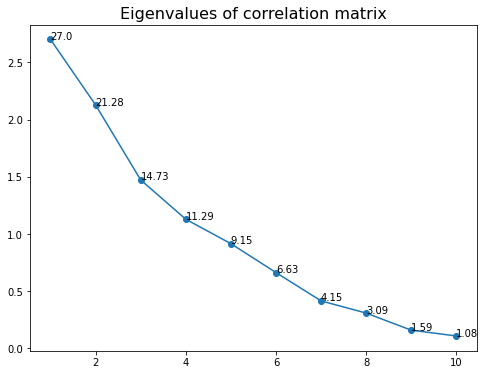

In [97]:
plt.figure(figsize=(8, 6)) #создали область Figure
plt.title('Eigenvalues of correlation matrix',fontsize=16)
plt.plot(df['number'], df['eig'], marker='o')
#plot рисует точки, соединенные линиями, df - датафрейм из прошлого блока кода
ax = plt.gca()
#используется для получения текущего экземпляра Axes на текущей фигуре, axes- непосредственно область построения
df.apply(lambda x: ax.annotate(x['variance_share, %'], (x['number'], x['eig'])), axis=1)
#применение функции к каждой строке, annotate добавляет аннотацию на координатную плоскость в координаты (x, y)
plt.show()

## Вклады главных компонент в суммарную дисперсию исходных признаков

In [98]:
print("Вклады главных компонент в суммарную дисперсию исходных признаков")
result = pd.concat([df, np.cumsum(df[['eig', 'variance_share, %']])], axis=1) 
#concat соединяет пересекающиеся данные для заполнения недостающих значений в структуре, 
#cumsum () возвращает кумулятивную (накапливаемую) сумму элементов массива
result.columns = list(df.columns) + ['cum_eig', 'cum_variance_share, %']
result

Вклады главных компонент в суммарную дисперсию исходных признаков


,eig,number,"variance_share, %",cum_eig,"cum_variance_share, %"
0,2.700481,1,27.00,2.700481,27.00
1,2.127995,2,21.28,4.828476,48.28
2,1.472639,3,14.73,6.301115,63.01
3,1.129087,4,11.29,7.430202,74.30
4,0.915486,5,9.15,8.345689,83.45
5,0.663013,6,6.63,9.008702,90.08
6,0.415223,7,4.15,9.423925,94.23
7,0.308582,8,3.09,9.732507,97.32
8,0.159159,9,1.59,9.891666,98.91
9,0.108334,10,1.08,10.000000,99.99


## Матрица главных компонент U

In [81]:
# Коэффициенты линейного преобразования центрировано-нормированных исходных признаков
u = np.empty((f_len, f_len))  #матрица U главных компонент
for i in range(f_len):
    u[i] = couple_lst[i][1]  #достаем главные компоненты
    #print(u[i])
    #u[i] - собственные вектора корреляционный матрицы
# Создадим фрейм
u = pd.DataFrame(
    data=u.T,
    columns=['Factor_' + str(i+1) for i in range(f_len)],
    index=features
)
u

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6,Factor_7,Factor_8,Factor_9,Factor_10
X1,-0.263754,-0.176597,0.237789,0.545809,-0.315318,-0.480902,0.389333,-0.245518,0.005609,-0.047041
X2,-0.110795,0.021270,0.729234,-0.258914,0.087564,0.193241,0.269029,0.150444,0.472476,0.158745
X3,0.009778,-0.172556,0.006724,0.671450,0.614178,0.335974,-0.033385,0.122363,0.108499,-0.035881
X4,0.245933,-0.519559,-0.248193,-0.183174,-0.065124,0.041914,0.417430,0.233437,0.227017,-0.536793
X5,0.175785,0.484394,-0.377435,0.077951,0.060023,0.005410,0.649574,0.145849,0.093754,0.360955
X6,0.034410,-0.646498,-0.124637,-0.063450,-0.114317,0.119180,0.030725,-0.012479,-0.089723,0.724482
X7,0.325328,0.111741,0.083544,0.274430,-0.585490,0.626136,-0.023799,-0.236622,0.057102,-0.068713
X8,0.473895,0.037938,0.145051,0.239852,-0.221851,-0.360418,-0.305774,0.623018,0.140034,0.122631
X9,0.521908,-0.028789,-0.022269,-0.052951,0.240542,-0.283190,-0.111838,-0.615001,0.435053,0.073622
X10,-0.471902,0.035953,-0.404379,0.070083,-0.211904,0.019443,-0.266868,0.061864,0.696021,0.053013


## Полная матрица нагрузок

In [82]:
# полная матрица нагрузок
sqrt_l = np.eye(f_len)
for i in range(f_len):
    sqrt_l[i][i] = math.sqrt(eigenvalues_sorted[i])
A = np.dot(u, sqrt_l)
A = pd.DataFrame(
    data=A,
    columns=['Factor_' + str(i+1) for i in range(f_len)],
    index=features
)
A

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6,Factor_7,Factor_8,Factor_9,Factor_10
X1,-0.433431,-0.257613,0.288562,0.579969,-0.301700,-0.391578,0.250878,-0.136386,0.002238,-0.015483
X2,-0.182072,0.031028,0.884942,-0.275118,0.083782,0.157348,0.173357,0.083572,0.188493,0.052250
X3,0.016069,-0.251718,0.008160,0.713472,0.587652,0.273569,-0.021513,0.067973,0.043285,-0.011810
X4,0.404146,-0.757914,-0.301189,-0.194638,-0.062312,0.034129,0.268983,0.129675,0.090568,-0.176681
X5,0.288871,0.706617,-0.458026,0.082829,0.057431,0.004405,0.418571,0.081019,0.037403,0.118805
X6,0.056546,-0.943089,-0.151250,-0.067421,-0.109380,0.097043,0.019798,-0.006932,-0.035795,0.238457
X7,0.534616,0.163004,0.101383,0.291606,-0.560203,0.509835,-0.015336,-0.131444,0.022781,-0.022616
X8,0.778758,0.055342,0.176023,0.254863,-0.212270,-0.293473,-0.197034,0.346087,0.055866,0.040363
X9,0.857659,-0.041997,-0.027024,-0.056265,0.230153,-0.230589,-0.072066,-0.341634,0.173563,0.024232
X10,-0.775484,0.052448,-0.490723,0.074469,-0.202752,0.015832,-0.171964,0.034366,0.277676,0.017449


### Матрица нагрузок A

In [85]:
#возьмем только первые главные компоненты
u1 = u.iloc[:, :pc]

# рассчитаем первые pc для матрицы назгрузок
A1 = A.iloc[:, :pc]
A1

,Factor_1,Factor_2,Factor_3,Factor_4
X1,-0.433431,-0.257613,0.288562,0.579969
X2,-0.182072,0.031028,0.884942,-0.275118
X3,0.016069,-0.251718,0.008160,0.713472
X4,0.404146,-0.757914,-0.301189,-0.194638
X5,0.288871,0.706617,-0.458026,0.082829
X6,0.056546,-0.943089,-0.151250,-0.067421
X7,0.534616,0.163004,0.101383,0.291606
X8,0.778758,0.055342,0.176023,0.254863
X9,0.857659,-0.041997,-0.027024,-0.056265
X10,-0.775484,0.052448,-0.490723,0.074469


## Матрица индивидуальных значений главных компонент

In [87]:
# Матрица индивидуальных значений главных компонент
# @ - оператор перемноженния матриц
F = (np.linalg.inv(A.T @ A) @ A.T @ data.T).T 
F = F.iloc[:, :pc] # Берем первые pc главных компонент
F.columns = ['Factor_' + str(i + 1) for i in range(pc)]
F[:85]

,Factor_1,Factor_2,Factor_3,Factor_4
Субъект Российской Федерации,,,,
Алтайский край,0.592257,0.688149,-0.084734,0.465057
Амурская область,2.043330,0.076049,0.398013,0.441490
Архангельская область,-0.037450,-0.419301,0.108253,-0.779936
Астраханская область,-0.077471,0.608608,-0.550296,-0.056314
Белгородская область,-1.334893,-0.176085,1.087643,-0.760375
...,...,...,...,...
Чеченская Республика,-1.768303,0.753838,-2.179770,-0.711162
Чувашская Республика,-0.500105,0.891636,0.223926,-0.577922
Чукотский автономный округ,1.409019,-3.461252,-1.137689,-2.230303


### Сравнить эту матрицу с полученной в STATISTICA
#### Если есть столбцы с обратными знаками, то раскомментировать соответствующую строчку

In [88]:
#раскомментировать, если у вас компоненты с обратными знаками
# F['Factor_1']=F['Factor_1']*(-1)
# F['Factor_2']=F['Factor_2']*(-1)
# F['Factor_3']=F['Factor_3']*(-1)
# F['Factor_4']=F['Factor_4']*(-1)
F

,Factor_1,Factor_2,Factor_3,Factor_4
Субъект Российской Федерации,,,,
Алтайский край,-0.592257,0.688149,0.084734,0.465057
Амурская область,-2.043330,0.076049,-0.398013,0.441490
Архангельская область,0.037450,-0.419301,-0.108253,-0.779936
Астраханская область,0.077471,0.608608,0.550296,-0.056314
Белгородская область,1.334893,-0.176085,-1.087643,-0.760375
...,...,...,...,...
Чеченская Республика,1.768303,0.753838,2.179770,-0.711162
Чувашская Республика,0.500105,0.891636,-0.223926,-0.577922
Чукотский автономный округ,-1.409019,-3.461252,1.137689,-2.230303


## Загружаем распределение по классам для метода Уорда и К-средних
### Нужно назвать столбцы в Excel как ward_old и kmeans_old соответственно !!!
### Изменить название екселевского файла в методе read_excel !!!

In [89]:
#загружаем метки классов, полученные на 1 л/р для метода Уорда и К-средних

classes = pd.read_excel('Уорда+k средних.xlsx', engine='openpyxl')
F['ward_old'] = classes.ward_old.values
F['kmeans_old'] = classes.kmeans_old.values
F

,Factor_1,Factor_2,Factor_3,Factor_4,ward_old,kmeans_old
Субъект Российской Федерации,,,,,,
Алтайский край,-0.592257,0.688149,0.084734,0.465057,3,5
Амурская область,-2.043330,0.076049,-0.398013,0.441490,3,2
Архангельская область,0.037450,-0.419301,-0.108253,-0.779936,4,1
Астраханская область,0.077471,0.608608,0.550296,-0.056314,4,1
Белгородская область,1.334893,-0.176085,-1.087643,-0.760375,4,1
...,...,...,...,...,...,...
Чеченская Республика,1.768303,0.753838,2.179770,-0.711162,1,1
Чувашская Республика,0.500105,0.891636,-0.223926,-0.577922,4,1
Чукотский автономный округ,-1.409019,-3.461252,1.137689,-2.230303,2,4


### Кластеризируем полученный результат и строим дендрограмму по методу Уорда

In [90]:
#кластеризация
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy

Text(0.5, 1.0, 'ward method')

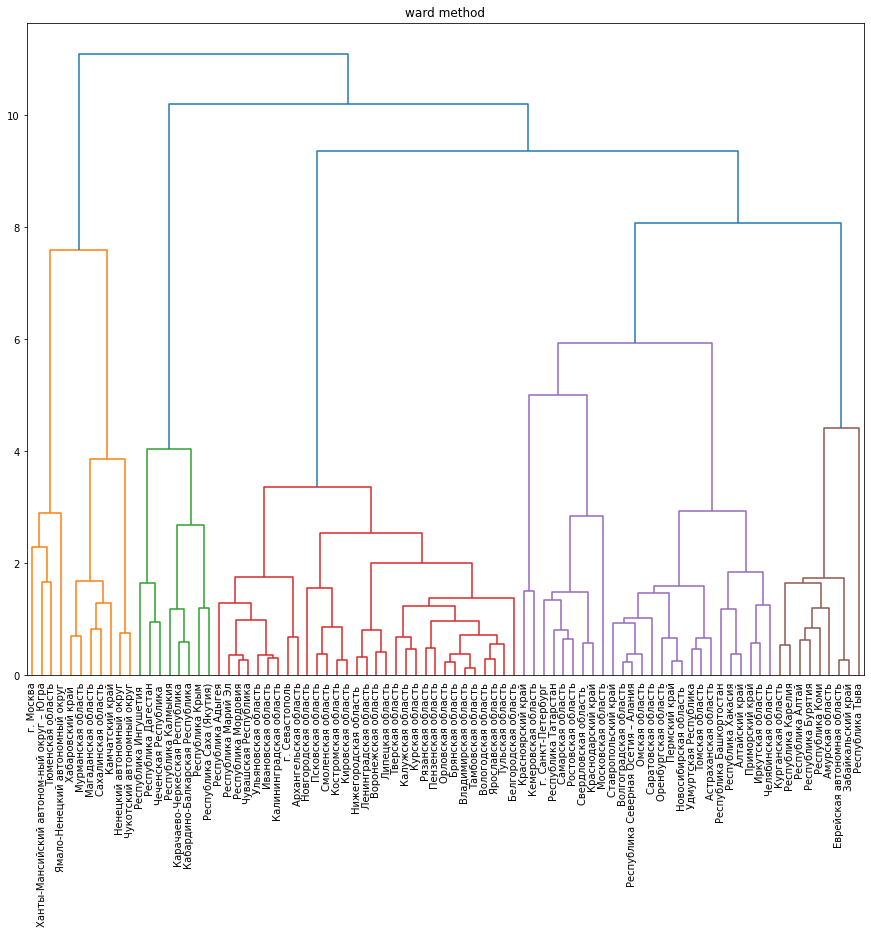

In [91]:
Z = hierarchy.linkage(F.iloc[:, :pc], method='ward', optimal_ordering=True)
    #строим дендрограмму

plt.figure(figsize=(15,12)) #задаем размеры окна с графиками

hierarchy.dendrogram(Z, labels=F.index, leaf_font_size=10)

  #Z - результат кластеризации, labels - названия строк (ось Х), leaf_font_size - размер шрифта

plt.title('{} method'.format('ward'))

### Посчитать количество классов по гистограмме и записать это число в переменную n_clusters

In [92]:
n_clusters = 5 #изменить это значение!
ward = AgglomerativeClustering(n_clusters=n_clusters , linkage='ward')
ward.fit(F.iloc[:, :pc])

kmeans = KMeans(n_clusters=n_clusters , random_state=36)
kmeans.fit(F.iloc[:, :pc])
# т.к. в питоне отсчет с нуля, то +1
F['ward_new'] = ward.labels_+1
F['kmeans_new'] = kmeans.labels_+1
F

,Factor_1,Factor_2,Factor_3,Factor_4,ward_old,kmeans_old,ward_new,kmeans_new
Субъект Российской Федерации,,,,,,,,
Алтайский край,-0.592257,0.688149,0.084734,0.465057,3,5,2,2
Амурская область,-2.043330,0.076049,-0.398013,0.441490,3,2,5,2
Архангельская область,0.037450,-0.419301,-0.108253,-0.779936,4,1,4,1
Астраханская область,0.077471,0.608608,0.550296,-0.056314,4,1,2,1
Белгородская область,1.334893,-0.176085,-1.087643,-0.760375,4,1,4,1
...,...,...,...,...,...,...,...,...
Чеченская Республика,1.768303,0.753838,2.179770,-0.711162,1,1,3,4
Чувашская Республика,0.500105,0.891636,-0.223926,-0.577922,4,1,4,1
Чукотский автономный округ,-1.409019,-3.461252,1.137689,-2.230303,2,4,1,3


### Построение двумерных графиков по методам Уорда и k-средних (после МГК для переменных Factor 1 и Factor 2)

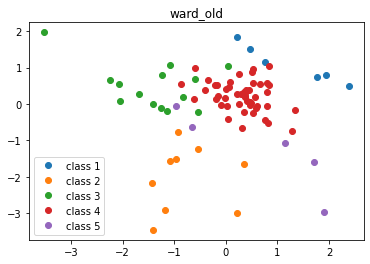

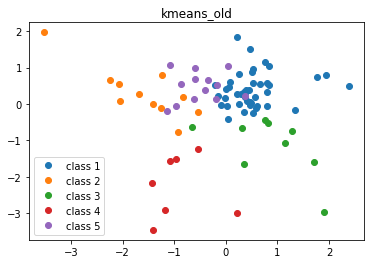

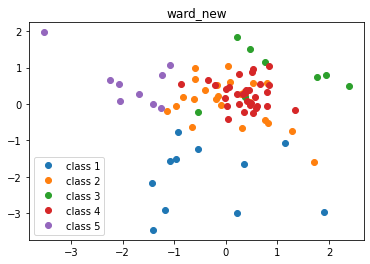

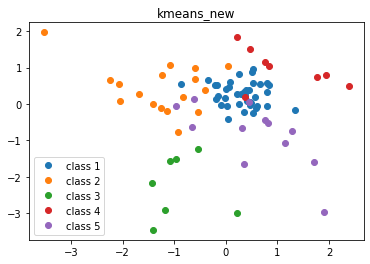

In [94]:
#построение графика по factor 1 и factor 2

for method in ['ward_old', 'kmeans_old', 'ward_new', 'kmeans_new']:
    plt.title(method)
    n_clusters = len(F[method].unique())
    i=1
    while (i <= n_clusters ): # Цикл по меткам классов
        data = F[F[method] == i]
        plt.plot(data.Factor_1, data.Factor_2, 'o', label=f'class {i}')
        i += 1
    plt.legend()
    plt.show()


### Построение двумерных графиков по методам Уорда и k-средних (после МГК для переменных Factor 1 и Factor 3)
#### ТОЛЬКО ДЛЯ 3 ГЛАВНЫХ КОМПОНЕНТ !!!

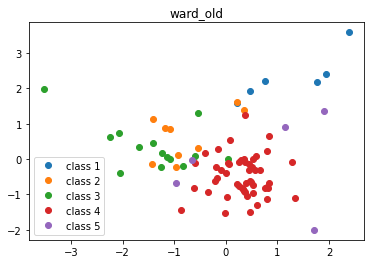

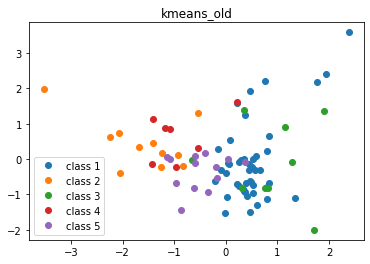

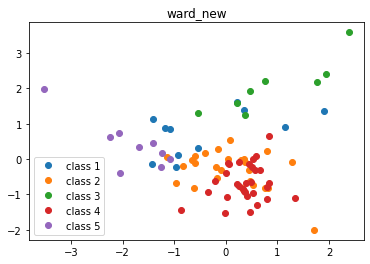

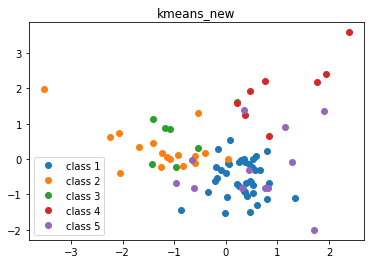

In [45]:
#построение графика

for method in ['ward_old', 'kmeans_old', 'ward_new', 'kmeans_new']:
    plt.title(method)
    n_clusters = len(F[method].unique())
    i=1
    while (i <= n_clusters ): # Цикл по меткам классов
        data = F[F[method] == i]
        plt.plot(data.Factor_1, data.Factor_3, 'o', label=f'class {i}')
        i += 1
    plt.legend()
    plt.show()


### Построение трехмерного графика по методам Уорда и k-средних
#### ТОЛЬКО ДЛЯ 3 ГЛАВНЫХ КОМПОНЕНТ !!!

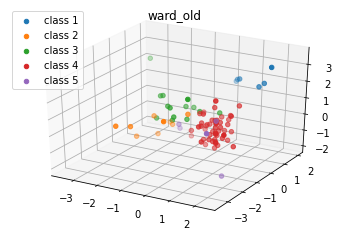

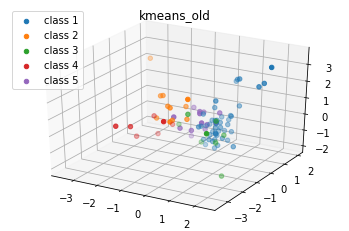

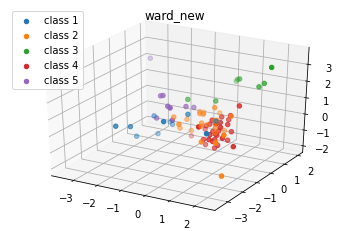

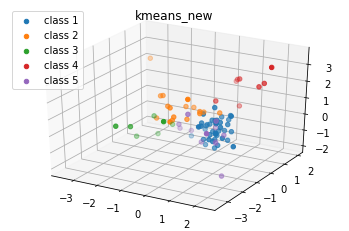

In [95]:
#трёхмерный график
from mpl_toolkits.mplot3d import Axes3D

for method in ['ward_old', 'kmeans_old', 'ward_new', 'kmeans_new']:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(method)
    n_clusters = len(F[method].unique())
    i = 1
    while (i <= n_clusters ): # Цикл по меткам классов
        data = F[F[method] == i]
        ax.scatter(data.Factor_1, data.Factor_2, data.Factor_3, 'o', label=f'class {i}') 
        i += 1
    plt.legend()
    plt.show()

# label=f'class {i}'

## Выгрузка полученных результатов в екселевский файл

In [39]:
#выгрузка в файл
F.to_excel('Lab3_python.xlsx')